<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/Doubts_Students/sorgo_ANN_otimiza_test_fev_13_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [52]:
#n = input('Entre sua escolha (0,1 ou 2) para  (ponta negra, 1g100, dbk550:')
uploaded = files.upload()

Saving Novos Pontos DBK 550.xlsx to Novos Pontos DBK 550 (3).xlsx


In [53]:
choose = ["sorgopontanegra.csv","Sorgo_1G100.csv","Sorgo_DBK550.csv"]
#DAT=pd.read_csv(choose[int(n)])
# DAT = pd. read_excel('Dados 1G100_Pontos novos.xlsx')
# DAT = pd. read_excel('Dados completos 1G100.xlsx')
DAT = pd. read_excel('Novos Pontos DBK 550.xlsx')
print(DAT.head())

  Run       SO    IN        GL       Et  Ethanol (L/100kg sorgo)       Fi  \
0   1   35.000  15.0   24.8075  10.2423                37.089625  25.8914   
1   2   35.000  45.0   27.0086  13.1010                47.441608  25.5885   
2   3  165.000  15.0   94.7485  41.6580                31.999078  45.3776   
3   4  165.000  45.0  105.3143  48.9050                37.565772  52.7557   
4   5   25.445  30.0   19.1501   9.4690                47.165523  32.5240   

         ST         Y1  
0   24.8075  80.796694  
1   27.0086  94.925190  
2   94.7485  86.040945  
3  105.3143  90.875124  
4   19.1501  96.763634  


In [54]:
def zscore(x,xold):
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=(x[:,j]-avgx)/stdx
  return x

In [55]:
def z2val(x,xold): 
  x = np.array(x)
  xold = np.array(xold)
  nrows, ncol = x.shape
  for j in range(ncol):
    avgx,stdx = np.average(xold[:,j]), np.std(xold[:,j])
    x[:,j]=x[:,j]*stdx+avgx
  return x

In [56]:
DAT.columns=['Run', 'SO', 'IN', 'GL ', 'Et', 'Et2', 'Fi', 'ST', 'Y1']

In [57]:
Col_Indep=['SO','IN']
names =[ 'Et']
#names =[ 'Y1']

In [58]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=14) # 2,3,4,5,6,7,8,9,10,11,22

In [59]:
# separa as colunas de interesse
x_train=DAT[Col_Indep].iloc[itrain,:].copy()
y_train=DAT[names].iloc[itrain,:].copy()
x_test = DAT[Col_Indep].iloc[itest,:].copy()
y_test = DAT[names].iloc[itest,:].copy()

In [60]:
xold, yold = DAT[Col_Indep],DAT[names]

In [61]:
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)
x_test, y_test = zscore(x_test,xold), zscore(y_test,yold)

In [62]:
x_train

array([[ 1.28040331, -1.32787567],
       [-1.22016134,  1.32787567],
       [ 1.28040331,  0.88525045],
       [ 1.46313688,  0.        ],
       [-1.22016134, -1.32787567],
       [ 0.99187662, -0.88525045],
       [ 0.03012098,  0.        ],
       [ 0.03012098,  1.52263077],
       [ 0.03012098, -1.52263077],
       [-1.22016134, -0.88525045],
       [ 0.03012098,  0.        ],
       [-0.16223014, -0.44262522]])

In [63]:
# define a rede neural 
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,15):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [64]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.982181,0.977837
1,2,0.991234,0.998876
2,3,0.997989,0.855697
3,4,0.999998,0.988191
4,5,0.999996,0.992721
5,6,0.999998,0.991916
6,7,0.999991,0.998032
7,8,0.999999,0.995827
8,9,1.000000,0.968358
9,10,0.999999,0.973049


In [65]:
# define a rede neural 
N_Hidden= 5
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=5,
             random_state=1, solver='lbfgs')

In [66]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [67]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [68]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train, y_calc_test = z2val(y_calc_train,yold), z2val(y_calc_test,yold)
y_train, y_test = z2val(y_train,yold), z2val(y_test,yold)

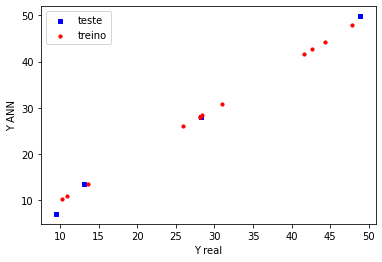

In [69]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [70]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9999961274625884
r2 (test)= 0.9927207292047671


In [71]:
y_calc_train

array([[41.67241233],
       [13.58744229],
       [47.87014357],
       [42.70153165],
       [10.21345207],
       [44.221072  ],
       [28.10706021],
       [30.91968157],
       [28.38862101],
       [10.94686537],
       [28.10706021],
       [25.96530531]])

In [72]:
y_train

array([[41.658     ],
       [13.61173333],
       [47.85835   ],
       [42.6768    ],
       [10.2423    ],
       [44.26233333],
       [28.1069    ],
       [30.9133    ],
       [28.3996    ],
       [10.90296667],
       [28.13126   ],
       [25.94373333]])

In [73]:
DAT

,Run,SO,IN,GL,Et,Et2,Fi,ST,Y1
0,1,35.000,15.0,24.807500,10.242300,37.089625,25.8914,24.807500,80.796694
1,2,35.000,45.0,27.008600,13.101000,47.441608,25.5885,27.008600,94.925190
2,3,165.000,15.0,94.748500,41.658000,31.999078,45.3776,94.748500,86.040945
3,4,165.000,45.0,105.314300,48.905000,37.565772,52.7557,105.314300,90.875124
4,5,25.445,30.0,19.150100,9.469000,47.165523,32.5240,19.150100,96.763634
5,6,174.500,30.0,90.474800,42.676800,30.996982,42.8579,90.474800,92.308845
6,7,100.000,12.8,68.676800,28.399600,35.994423,39.0770,68.676800,80.924732
7,8,100.000,47.2,67.400500,30.913300,39.180355,37.2130,67.400500,89.755558
8,9,100.000,30.0,68.617800,28.131260,35.654322,43.6960,68.617800,80.229021
9,10,100.000,30.0,66.871400,28.106900,35.623447,41.4865,66.871400,82.252978


In [74]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [75]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [76]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes).reshape(-1,1)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  150.42232  41.296238
[[55.20223567]]


In [77]:
# separa as colunas de interesse
x_train, y_train = DAT[Col_Indep],DAT[names]
x_train, y_train = zscore(x_train,xold), zscore(y_train,yold)

In [78]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.983865,0.983865
1,2,0.995061,0.995061
2,3,0.999687,0.999687
3,4,0.999813,0.999813
4,5,0.999948,0.999948
5,6,0.999879,0.999879
6,7,0.999932,0.999932
7,8,0.999948,0.999948
8,9,0.999944,0.999944
9,10,0.999944,0.999944


In [79]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [80]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [81]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [82]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
Y=clf.predict(Condicoes).reshape(-1,1)

Condicoes= z2val(Condicoes,xold)
resp = pd.DataFrame(Condicoes,columns=Col_Indep)
print(resp)
Y =  z2val(Y,yold)
print(Y)

          SO         IN
0  150.42232  41.296238
[[48.14821453]]
